# 🧪 Actividad Evaluada: Árboles de Decisión en el Dataset Titanic

📚 **Curso:** Machine Learning

## 📝 Instrucciones
- Este notebook debe ser completado individualmente y subido a la plataforma del curso.
- Responde todas las celdas marcadas como código y asegúrate de que el notebook se ejecute sin errores.
- Puedes usar material del curso y documentación oficial de Python y Scikit-learn.

## 📄 Descripción del Dataset
El dataset **Titanic** contiene información sobre los pasajeros del famoso barco Titanic que naufragó en 1912. El objetivo es predecir si un pasajero sobrevivió o no (`Survived` = 1 si sobrevivió, 0 si no), a partir de variables como edad, clase, sexo, y punto de embarque.

Este conjunto de datos es ampliamente utilizado en aprendizaje automático como un primer ejemplo de clasificación supervisada.

---

# 🌊 Actividad Evaluada: Árboles de Decisión con el Dataset Titanic

En esta actividad aplicarás un modelo de árboles de decisión sobre el dataset Titanic.

### 🎯 Objetivos:
- Cargar y explorar el dataset
- Preprocesar las variables categóricas con One Hot Encoding
- Entrenar un árbol de decisión
- Visualizar el árbol
- Evaluar el desempeño del modelo

🕐 Tiempo estimado: 60 a 90 minutos

In [66]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier #tipo de clasificador
from sklearn.tree import plot_tree #visualizar arbol de decision

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# %matplotlib inline
# %pandas inline
# %scikit-learn inline

In [10]:
# 📥 Cargar el dataset desde la URL de Kaggle (alternativamente cargar localmente)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔍 1. Exploración inicial del dataset

Antes de comenzar a entrenar modelos de Machine Learning, es fundamental **comprender la estructura y el contenido del conjunto de datos**. En esta sección, deberás realizar una exploración básica del dataset Titanic para identificar:

- Las columnas disponibles y sus tipos de datos (`.info()`)
- Las estadísticas descriptivas de las variables numéricas (`.describe()`)
- La existencia de valores faltantes (`.isnull().sum()`)

Estas acciones te permitirán decidir qué pasos de limpieza y preprocesamiento son necesarios. **Recuerda comentar brevemente tus observaciones** al final de esta sección, por ejemplo: si hay columnas con muchos datos faltantes, si hay outliers o si ciertas variables parecen poco informativas.

In [11]:
df.isnull().sum() #verificar si hay datos nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 🧹 2. Preprocesamiento

Antes de entrenar un modelo de Machine Learning, es necesario **preparar adecuadamente los datos**. Este proceso se conoce como *preprocesamiento* y consiste en dejar el conjunto de datos en un formato que los algoritmos puedan utilizar de manera efectiva.

### Pasos a seguir:

1. **Eliminar columnas innecesarias**: Algunas columnas como `PassengerId`, `Name`, `Ticket` o `Cabin` no aportan información útil al modelo o contienen datos difíciles de procesar automáticamente (como texto libre o demasiados valores únicos).

2. **Manejo de valores faltantes**:
   - La columna `Age` tiene valores faltantes que puedes reemplazar por la **mediana**, ya que es menos sensible a valores extremos.
   - La columna `Embarked` tiene pocos valores faltantes, así que puedes usar la **moda** (valor más frecuente) para completarlos.

3. **Codificación de variables categóricas**:
   - Los algoritmos no pueden trabajar directamente con texto. Por eso, aplicamos **One Hot Encoding** a las variables categóricas como `Sex` y `Embarked`, transformándolas en columnas binarias (0 y 1).
   - Usar `drop_first=True` evita multicolinealidad y reduce la cantidad de columnas.

> ⚠️ **Importante:** El preprocesamiento tiene un gran impacto en la calidad del modelo. Un paso mal hecho puede afectar seriamente el desempeño del algoritmo.

Al finalizar esta etapa, deberías tener un dataset **limpio, sin valores nulos y completamente numérico**.

In [13]:
# eliminar columnas innecesarias
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
# convirtiendo los null de age en la mediana de la edad
df['Age'].fillna(df['Age'].median(), inplace=True)
# convirtiendo los null de embarked en la moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# aplicando one-hot encoding a las variables categóricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.head()

C:\Users\valen\AppData\Local\Temp\ipykernel_14200\3963774199.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\valen\AppData\Local\Temp\ipykernel_14200\3963774199.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [14]:
# volver a revisar si hay datos nulos
df.isnull().sum() 

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

## 🧠 3. Entrenamiento del modelo de Árbol de Decisión

En esta etapa, construiremos un modelo predictivo utilizando un **Árbol de Decisión**, una técnica de clasificación que divide los datos en ramas sucesivas para tomar decisiones basadas en las características del conjunto de datos.

### Pasos a seguir:

1. **Separar las variables predictoras (X) y la variable objetivo (y)**.  
   En este caso, `Survived` será nuestra variable objetivo, y el resto de las columnas las usaremos como predictores.

2. **Dividir los datos en conjuntos de entrenamiento y prueba**.  
   Esto se hace para evaluar el modelo con datos que no ha visto antes. Usa `train_test_split` para crear una división, por ejemplo 70% entrenamiento y 30% prueba.

3. **Crear y entrenar el modelo con `DecisionTreeClassifier`**.  
   Puedes usar el parámetro `max_depth` para limitar la profundidad del árbol y evitar sobreajuste.

Cuando termines esta sección, tu modelo estará entrenado y listo para ser evaluado y visualizado.

In [16]:
X = df.drop(columns=['Survived']) # variables independientes
y = df['Survived'] # variable dependiente

In [17]:
# dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
# crear y entrenar el modelo
model = DecisionTreeClassifier(random_state=42, max_depth=3)

In [47]:
model.fit(X_train, y_train) #entrenar el modelo

DecisionTreeClassifier(max_depth=3, random_state=42)

## 🌳 4. Visualización del árbol

Una de las grandes ventajas de los árboles de decisión es que su estructura se puede visualizar de forma intuitiva, lo que facilita la **interpretación del modelo**.

En esta sección usaremos la función `plot_tree()` de `sklearn` para graficar el árbol entrenado. En el gráfico:

- Cada **nodo interno** representa una condición de decisión sobre alguna variable.
- Cada **rama** muestra el resultado de esa decisión (verdadero o falso).
- Cada **nodo terminal** (o hoja) muestra la clase predicha y cuántas muestras llegaron a ese punto.

### Sugerencia:
Puedes ajustar los parámetros de `plot_tree()` como `feature_names`, `class_names` y `filled=True` para mejorar la legibilidad del árbol. Asegúrate de usar `plt.figure(figsize=(ancho, alto))` para que la visualización no se corte.

**Objetivo:** Entender cómo el modelo está tomando decisiones, qué variables usa y con qué prioridad.

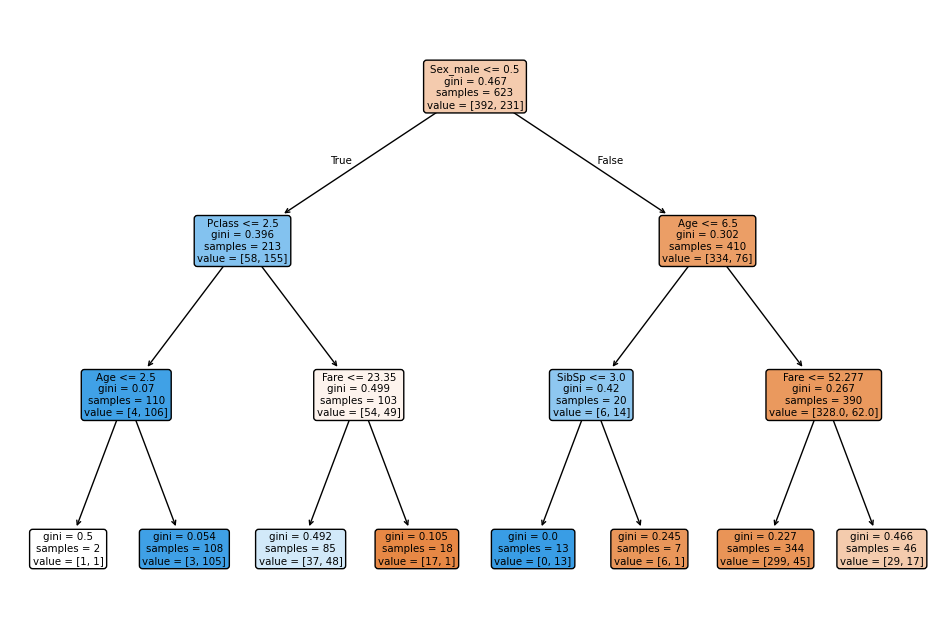

In [48]:
# ver árbol
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## 📈 5. Evaluación del modelo

Una vez entrenado el modelo, es fundamental **evaluar su desempeño** para entender qué tan bien está funcionando. En esta sección usaremos datos de prueba (no vistos por el modelo durante el entrenamiento) para calcular métricas que nos ayuden a juzgar la calidad de las predicciones.

### Métricas que utilizaremos:

- **Matriz de confusión (`confusion_matrix`)**: muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Es útil para entender errores específicos del modelo.
- **Reporte de clasificación (`classification_report`)**: incluye precisión (*precision*), exhaustividad (*recall*), y la métrica F1 para cada clase.
- **Exactitud (`accuracy_score`)**: indica qué porcentaje total de predicciones fue correcto.

Estas métricas te permitirán **identificar si el modelo está desbalanceado**, si tiende a predecir más una clase que otra, y si necesita ajustes en parámetros o preprocesamiento.

> 💡 Recuerda: un modelo con buena precisión pero bajo *recall* puede ser problemático si nos interesa no dejar pasar casos positivos (como sobrevivientes).

In [62]:
# calcular una predicción
y_pred = model.predict(X_test)


In [64]:
# interpretar la predicción
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head(10) #ver las primeras 10 predicciones


,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


In [65]:
confusion_matrix(y_test, y_pred) #matriz de confusión


array([[139,  18],
       [ 33,  78]])

In [68]:
accuracy_score(y_test, y_pred) #accuracy del modelo

0.8097014925373134

---
## 🤔 Preguntas de Reflexión

Responde brevemente las siguientes preguntas al final de tu actividad. Puedes escribir tus respuestas directamente bajo cada pregunta:

1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?

2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?

3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?

4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?

5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?


**1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?**

In [ ]:
# Escribe tu respuesta aquí...
""""
Sex, Pclass y Age, debido a que son las mas arriba en el árbol de decision, 
lo que indica que son las variables mas influyentes.
"""

**2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?**

In [ ]:
# Escribe tu respuesta aquí...
"""
podría llevar a un sobreajuste del modelo tal vez, y podría aprender
patrones específicos de los datos de entrenamiento que no se generalizan 
bien a los datos de prueba.
"""

**3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?**

In [ ]:
# Escribe tu respuesta aquí...
"""
Si usáramos codificación ordinal en vez de one-hot encoding, el modelo podría
tomar los valores de las variables categóricas como números, osea puede creer
que no son valores categóricos.
"""

**4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?**

In [ ]:
# Escribe tu respuesta aquí...
""" 
Quizás se podrían probar distintas combinaciones de numero de nodos, hojas y características,
vi un Grid Search que podría ayudar a encontrar la mejor combinación de hiperparámetros.
También fijarse en el nivel de importancia de las características y aplicar el modelo a las más relevantes.
"""

**5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?**

In [ ]:
# Escribe tu respuesta aquí...
""" 
Creo que si se podría usar en un entorno real para casos que requieren una respuesta en base
a categorías, sin embargo, directamente en casos simples. No como este, ya que es muy complejo
y no se puede explicar tan fácilmente.
La verdad en este caso no sería muy ético usarlo.
Y requeriría quizás un modelo más preciso porque este no lo es tanto
y/o mejor tratamiento de los datos que pueda explicar mejor los resultados.
"""